<a href="https://colab.research.google.com/github/ghubnerr/machine-learning/blob/main/autograd/intro_to_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent: The Foundation Block of Deep Learning

`credit to Gabriel Lucchesi and David Ulloa <3`

In [ ]:
import torch
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## What is Gradient Descent?
Gradient Descent is the process of "descending" down our calculated "gradients" in order to update the parameters of our model, ultimately improving it. By calculating our gradients with respect to a loss function - some function representing how well we're doing at a task - we can train our machine learning model.

Like we mention on Monday, PyTorch and Jax do this process automatically, but here we're going to learn how the process can actually be implemented by hand. First, we'll do this algebraically for a given loss function, then more abstractly for any set of operations.

In [ ]:
a = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(4.0, requires_grad = True)
x = a * b

# Have PyTorch calculate gradients
x.backward()
a.grad, b.grad # How do we do this ourselves?

(tensor(4.), tensor(3.))

## Gradient Descent For a Given Loss Function

Let's pick a loss function. If we're doing a linear regression problem, a good candidate would be MSE, or "Mean-Squared Error":

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2
$$

If we look at this loss function, some things to know:
* $ \hat{y}_i $ is the individual prediction for a given input, $ \hat{x}_i $.
* We square the difference, making sure any error is positive, while also penalizing larger errors.
* $ n $ is the number of total samples.

To do gradient descent on a given function, we have to find the partial derivatives of each variable with respect to "MSE" (an unusual variable name, but to make things clearer, let's say MSE is equal to a function $ L $).

$$ L = \frac{1}{n} \sum_{i=1}^{n} \bigl(\hat{y}_i - y\bigr)^2 $$

but we know what $\hat{y}_i$ equals. The result of providing one input, $x$, into our model with some weight $w_i$ and a bias, $b$, gives us our $\hat{y}_i$. Together this gives us:

$$
L(x) = \frac{1}{n} \sum_{i=1}^{n} \bigl( w_ix_i + b - y)^2
$$

Now let's try to get the partial derivatives with respect to $w_i$ and $b$...

### Spoiler 👀

$$
L(w, b) \;=\; \frac{1}{n}\sum_{i=1}^n \bigl(\bigl(w \, x_i + b\bigr)-y_i\bigr)^2
$$

$$
\frac{\partial L}{\partial w}
\;=\;
\frac{2}{n}
\sum_{i=1}^{n}
x_i \,
\Bigl(\bigl(w\,x_i + b\bigr)-y_i\Bigr)
$$

$$
\frac{\partial L}{\partial b}
\;=\;
\frac{2}{n}
\sum_{i=1}^{n}
\Bigl(\bigl(w\,x_i + b\bigr)-y_i\Bigr)
$$


### Implementation in Python

In [ ]:
# Creating some fake data
SAMPLES = 500
x = np.arange(1, SAMPLES)
random.shuffle(x)

y = 0.3 * x + 4

x[:5], y[:5]

(array([268, 274, 211, 176, 122]), array([84.4, 86.2, 67.3, 56.8, 40.6]))

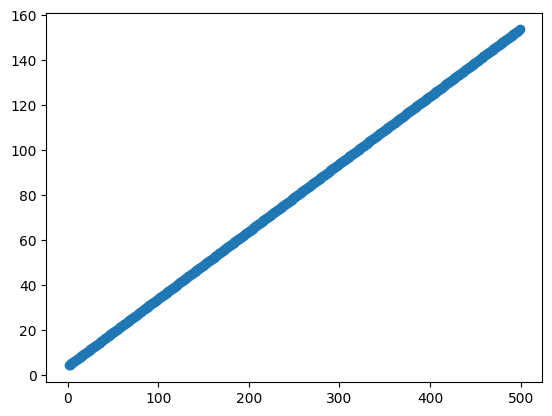

In [ ]:
# Visualizing Our Data
plt.scatter(x, y)

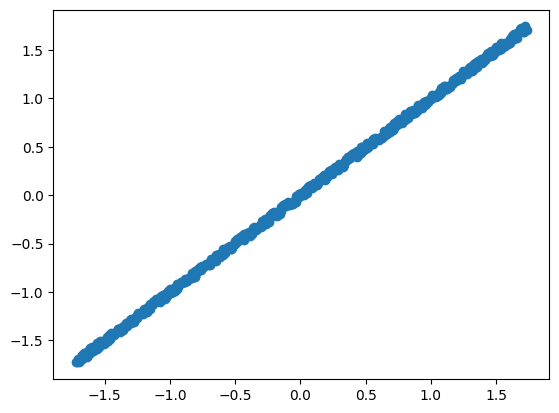

In [ ]:
# Let's add some more randomness to our dataset
x += np.random.randint(0, 3, size = len(x))
y += np.random.randint(0, 3, size = len(y))

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

plt.scatter(x, y)

In [ ]:
split = int(SAMPLES * 0.8)

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

(array([[-0.04818031,  0.43071584,  0.27108379, -0.37438493,  0.54870474]]), array([[-0.07222822,  0.39972403,  0.26322804, -0.38223608,  0.56398193]]))


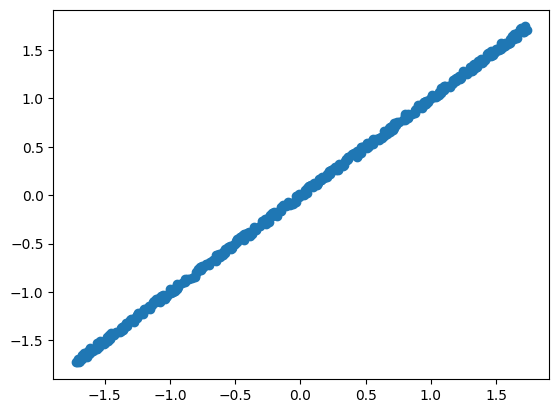

In [ ]:
def get_batch(train = True):
    if train:
      idx = np.random.randint(0, len(x_train) - 1, size = 5) # SAMPLES - 1 because .randint is inclusive of end
      return np.expand_dims(x_train[idx], axis = 0), np.expand_dims(y_train[idx], axis = 0)

    idx = np.random.randint(0, len(x_test) - 1, size = 5)
    return np.expand_dims(x_test[idx], axis = 0), np.expand_dims(y_test[idx], axis = 0)

print(get_batch())

plt.scatter(x_train, y_train)

In [ ]:
# Defining Our Model
w = np.random.rand(1, 1)
b = np.random.rand(1, 1)
print("Weight: ", w, ", Bias: ", b)

x_i = [x_train[0]]
print("Y_pred: ", x_i @ w + b, "Y-true: ", [y_train[0]])

Weight:  [[0.18713708]] , Bias:  [[0.4445541]]
Y_pred:  [[0.46800851]] Y-true:  [0.1012836356996815]


In [ ]:
# Define our loss function
def MSE(y_true, y_pred):
    return np.mean((y_pred - y_true)**2)

x, y = get_batch()
y_pred = w @ x + b
print(x.shape, w.shape, y_pred.shape)
print("MSE: ", MSE(y, y_pred))

(1, 5) (1, 1) (1, 5)
MSE:  0.6969520127712092


In [ ]:
EPOCHS = 500
learning_rate = 0.005

for epoch in range(EPOCHS):
    # Forward pass: compute predictions
    x, y = get_batch()
    y_pred = w @ x + b

    # Compute the MSE loss
    loss = MSE(y, y_pred)

    # Compute gradients of the loss with respect to w and b
    dw = 2 * np.mean((y_pred - y) * x)
    db = 2 * np.mean(y_pred - y)

    # Update the parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 50 == 0:
      print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

print(f"\nFinal model: y = {w[0][0]:.4f} * x + {b[0][0]:.4f}")

Epoch 0: Loss = 0.9929, w = 0.1956, b = 0.4375
Epoch 50: Loss = 0.4125, w = 0.5223, b = 0.2479
Epoch 100: Loss = 0.0580, w = 0.7172, b = 0.1466
Epoch 150: Loss = 0.0243, w = 0.8380, b = 0.0897
Epoch 200: Loss = 0.0089, w = 0.9006, b = 0.0531
Epoch 250: Loss = 0.0031, w = 0.9347, b = 0.0355
Epoch 300: Loss = 0.0034, w = 0.9614, b = 0.0208
Epoch 350: Loss = 0.0020, w = 0.9763, b = 0.0124
Epoch 400: Loss = 0.0008, w = 0.9856, b = 0.0066
Epoch 450: Loss = 0.0005, w = 0.9923, b = 0.0030

Final model: y = 0.9955 * x + 0.0017


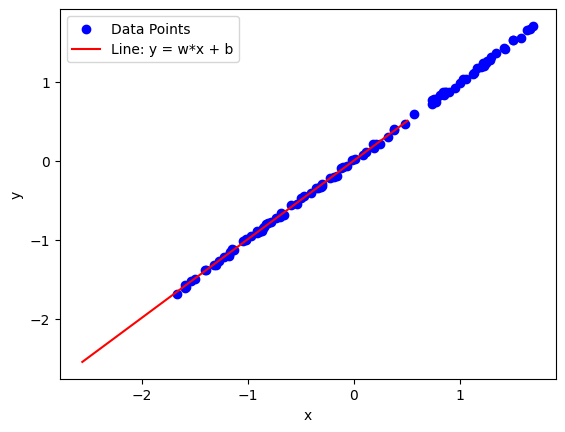

In [ ]:
# Plotting Our Results
plt.scatter(x_test, y_test, color='blue', label='Data Points')
x_line = np.linspace(x.min() - 1, x.max() + 1, 200)
y_line = w[0][0] * x_line + b[0][0]

plt.plot(x_line, y_line, color='red', label='Line: y = w*x + b')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# Building Your Own Auto-Differentiation Engine

Let's start with the idea that, through code, we have to calculate the "gradients" or partial derivative for some part of our model with respect to a loss function. How would we approach this? Let's look at different operations and how we could keep count of things manually:

### Addition

$ c = a + b $

- **Forward pass**: $ c = a + b $
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = 1, \quad
  \frac{\partial c}{\partial b} = 1
$$

### Multiplication

$ c = a * b $

- **Forward pass**: $ c = a * b $
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = b, \quad
  \frac{\partial c}{\partial b} = a
$$

### Subtraction

$ c = a - b $

- **Forward pass**: $ c = a - b $
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = 1, \quad
  \frac{\partial c}{\partial b} = -1
$$

### Division

$ c = \frac{a}{b} $

- **Forward pass**: \( c = a / b \)
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = \frac{1}{b}, \quad
  \frac{\partial c}{\partial b} = -\,\frac{a}{b^2}
$$

### Exponent (Base $e$)

$ c = e^a $

- **Forward pass**: \( c = \exp(a) \)
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = \exp(a)
$$

### Power

$ c = a^b $

(assuming $a > 0$, so $\ln(a)$ is well-defined)

- **Forward pass**: $ c = a^b $
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = b \, a^{\,b-1},
  \quad
  \frac{\partial c}{\partial b} = a^b \ln(a)
$$

### Logarithm

$ c = \ln(a) $
(assuming $a > 0$)

- **Forward pass**: \($ c = \ln(a)\$)
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = \frac{1}{a}
$$

### Tanh

$ c = \tanh(a) $

- **Forward pass**: \( $c = \tanh(a)$ \)
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a} = 1 - \tanh^2(a)
$$
  
### Sigmoid (Logistic Function)

$ c = \sigma(a) = \frac{1}{1 + e^{-a}} $

- **Forward pass**:
$$
  c = \frac{1}{1 + e^{-a}}
$$
- **Partial derivatives**:
$$
  \frac{\partial c}{\partial a}
    = \sigma(a)\bigl(1 - \sigma(a)\bigr)
    = c \,(1 - c)
$$

### ReLU (Rectified Linear Unit)

$ c = \max(0, a) $

- **Forward pass**: $ c = \begin{cases} a & \text{if } a > 0 \\ 0 & \text{otherwise} \end{cases} $
- **Partial derivatives** (subgradient definition at \(a=0\) often taken as \(0\) in practice):
$$
  \frac{\partial c}{\partial a} = \begin{cases}
  1 & \text{if } a > 0\\
  0 & \text{if } a \le 0
  \end{cases}
$$

## Let's Create Our Version of Torch Tensor

### Using `__dunder__` methods
We're going to do a version of each/most of these functions, in such a way that we don't need to specify the gradient calculation when we multiply them together.

Python has a very strategic and intuitive way of doing so- we call them dunder methods. They are reserved methods just like the `__init__` method.

### Defining our class

The basic class will follow this structure: a value, and a gradient. This is really similar to how PyTorch does it.

In [ ]:
class Tensor_1:
    def __init__(self, data):
        self.data = data
        self.grad = 0.0

We'll also add a set of helper parameters for our computation

In [ ]:
class Tensor_2:
    def __init__(self, data, _op='', label=''):
        self.data = data
        self.grad = 0.0

        # This is for printing purposes
        self._op = _op      # "operation"
        self.label = label

    def __repr__(self):
        return f"Tensor(data={self.data})"

In [ ]:
tensor = Tensor_2(2.0, label='x')
print(tensor)

Tensor(data=2.0)


### Creating initial operations w.r.t. our Tensor: Add, Mul and Sub

In [ ]:
class Tensor_3:
    def __init__(self, data, _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Tensor(data={self.data})"

    def __add__(self, other):
        # I want to be able to call Tensor(4) + 5 = Tensor(9), for example
        other = other if isinstance(other, Tensor_3) else Tensor_3(other)

        # We also want our output to be another Tensor.
        out = Tensor_3(self.data + other.data, '+')

        return out

    def __mul__(self, other):
        # Left multiplication
        other = other if isinstance(other, Tensor_3) else Tensor_3(other)
        out = Tensor_3(self.data * other.data, '*')

        return out

    def __neg__(self):
        # This would be i.e. y = -x, for example
        return self * -1

    # NOTE: this method is the same as calling addition on the negation
    def __sub__(self, other):
        return self + (-other)

![image](https://media.geeksforgeeks.org/wp-content/uploads/20200527151747/e19.png)

In [ ]:
a = Tensor_3(2.0, label='a')
b = Tensor_3(3.0, label='b')
c = Tensor_3(4.0, label='c')

d = a + b
e = b - c
y = d * e

print(d)
print(e)
print(y)

Tensor(data=5.0)
Tensor(data=-1.0)
Tensor(data=-5.0)


### Finishing with all operations

In [ ]:
import math # s*** got serious

In [ ]:
class Tensor_4:
    def __init__(self, data, _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Tensor(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Tensor_4) else Tensor_4(other)
        out = Tensor_4(self.data + other.data, '+')

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor_4) else Tensor_4(other)
        out = Tensor_4(self.data * other.data, '*')

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Tensor_4(self.data**other, f'**{other}')

        return out

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    # These don't have dunder methods!
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Tensor_4(t, 'tanh')
        return out

    def exp(self): # e^x
        x = self.data
        out = Tensor_4(math.exp(x), 'exp')
        return out

    def sine(self):
        x = self.data
        out = Tensor_4(math.sin(x), 'sin')
        return out

    def cosine(self):
        x = self.data
        out = Tensor_4(math.cos(x), 'cos')
        return out

    def sigmoid(self):
        out = (-(self)).exp()
        out = Tensor_4(1 / (1 + out.data), 'sigmoid')
        return out

In [ ]:
a = Tensor_4(2.0, label='a')
b = Tensor_4(3.0, label='b')
c = Tensor_4(4.0, label='c')

d = (a + b) * c
e = d.exp()
f = d.sigmoid()
g = (a - b).tanh()
h = (c / a).sine()

print("d =", d)
print("e =", e)
print("f =", f)
print("g =", g)
print("h =", h)


d = Tensor(data=20.0)
e = Tensor(data=485165195.4097903)
f = Tensor(data=0.9999999979388463)
g = Tensor(data=-0.7615941559557649)
h = Tensor(data=0.9092974268256817)


# Backpropagation: Using our derivatives!

So far we've established ways to perform basic operations between our tensors. But we haven't defined a way to actually perform the gradients with respect to our operations. To do this, we have to treat these tensors as actual nodes in a graph.

We'll add in these helper parameters:
- `_children: it represents the nodes that contributed to the current value during creation.
and these fields
- `_backward` : Defining the backward pass function. We'll override it in every primitive method
- `_prev`: Stores a set of nodes (i.e., other Tensor instances) that were used to create the current node. These are the immediate ancestors in the computational graph.

### Here's the idea:
We're defining `_backward` for every operation that will be performed in these tensors. But, we'll need to override them internally when the operations are called. We'll see that the intuition is that we need to compute our gradients topologically. Since the current computation depends on the computations that led to it.


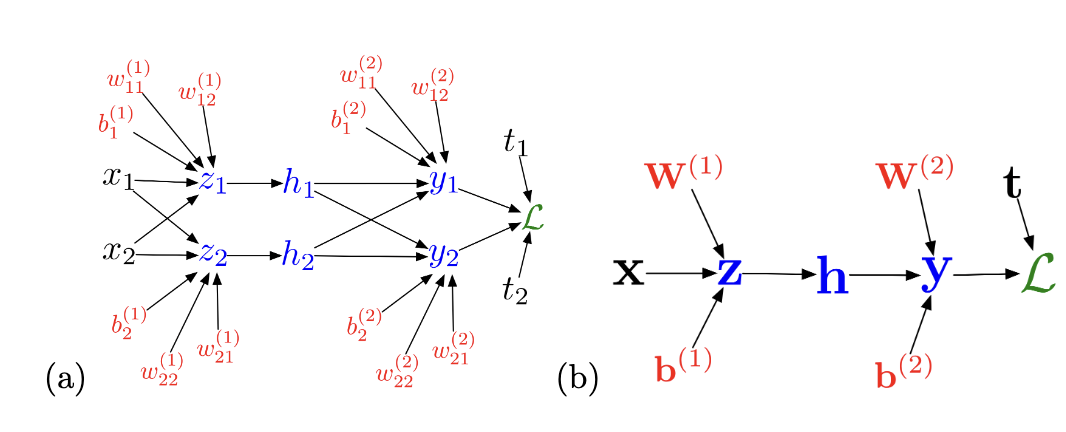


For that reason, we need to define a topological sorting algorithm when we call `.backward()`!

In [ ]:
class Tensor:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._op = _op
        self._backward = lambda: None # we'll override this
        self._prev = set(_children)
        self.label = label

    def __repr__(self):
        return f"Tensor(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, (self, other), '+')

        # Now we go back to the formulas above!
        def _backward():
            # dy/dx = 1, we multiply by out.grad for respect to the chain rule
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward # overriding the function!

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, (self, other), '*')

        def _backward():
            # dy/dx = x
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Tensor(self.data**other, (self,), f'**{other}')

        def _backward():
            # dy/dx = n*x^(n-1)
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    # These don't have dunder methods!
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Tensor(t, (self, ), 'tanh')

        def _backward():
            # dy/dx = 1-tanh^2(x)
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def exp(self): # e^x
        x = self.data
        out = Tensor(math.exp(x), (self, ), 'exp')

        def _backward():
            # dy/dx = e^x
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def sine(self):
        x = self.data
        out = Tensor(math.sin(x), (self, ), 'sin')

        def _backward():
            # dy/dx = cos(x)
            self.grad += self.cosine().data * out.grad
        out._backward = _backward
        return out

    def cosine(self):
        x = self.data
        out = Tensor(math.cos(x), (self, ), 'cos')

        def _backward():
            # dy/dx = -sin(x)
            self.grad += -self.sine().data * out.grad
        out._backward = _backward
        return out

    def sigmoid(self):
        out = (-(self)).exp()
        out = Tensor(1 / (1 + out.data), (self,), 'sigmoid')

        def _backward():
            # dy/dx = sigmoid(1-sigmoid)
            self.grad += (out.data * (1 - out.data)) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # dx/dx (final node!)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

![image](https://miro.medium.com/v2/resize:fit:1400/1*uMg_ojFXts2WZSjcZe4oRQ.png)

# Graphing a Computation Graph a.k.a. "Neural Network"

### Helper function

In [ ]:
from graphviz import Digraph

def trace(root):
    nodes ,edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
              edges.add((child, v))
              build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
          dot.node(name = uid + n._op, label = n._op)
          dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot. edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

## Backpropagation Example

In [ ]:
import random

In [ ]:
w = Tensor(random.uniform(-1, 1), label='w')
b = Tensor(random.uniform(-1, 1), label='b')

In [ ]:
def parameters():
    return [w, b]

In [ ]:
for epoch in range(500):
    # Get a batch of data
    x_batch, y_batch = get_batch()
    xs, ys = x_batch[0], y_batch[0]

    # model(x)
    y_pred = [w * xi + b for xi in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, y_pred)])  # MSE loss

    # optimizer.zero_grad()
    for p in parameters():
        p.grad = 0.0
    loss.backward()

    # optimizer.step()
    for p in parameters():
        p.data += -0.05 * p.grad

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.data:.4f}, w = {w.data:.4f}, b = {b.data:.4f}")

print(f"\nFinal model: y = {w.data:.4f} * x + {b.data:.4f}")

Epoch 0: Loss = 19.4666, w = -0.0173, b = 0.1382
Epoch 50: Loss = 0.0013, w = 0.9927, b = 0.0014
Epoch 100: Loss = 0.0021, w = 0.9968, b = 0.0069
Epoch 150: Loss = 0.0010, w = 0.9971, b = -0.0131
Epoch 200: Loss = 0.0017, w = 0.9942, b = 0.0076
Epoch 250: Loss = 0.0021, w = 1.0028, b = -0.0025
Epoch 300: Loss = 0.0055, w = 1.0078, b = -0.0052
Epoch 350: Loss = 0.0016, w = 0.9885, b = 0.0028
Epoch 400: Loss = 0.0028, w = 0.9966, b = -0.0005
Epoch 450: Loss = 0.0033, w = 0.9981, b = -0.0039

Final model: y = 0.9992 * x + -0.0064


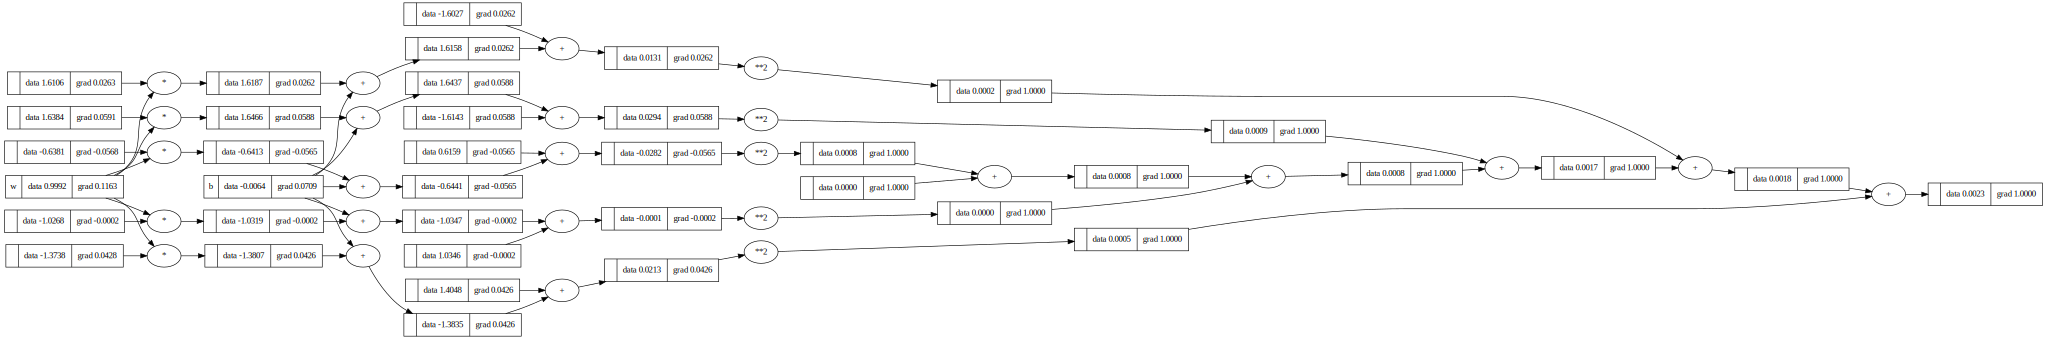

In [ ]:
draw_dot(loss)

## Creating a Neural Network with our Tensors

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Tensor(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Tensor(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):++++
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]